<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فعالیت‌بدنی‌بندی</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌های <b>تشخیص فعالیت انسانی (HAR)</b> مجموعه‌ای از داده‌های حسگر هستند که هدف آنها دسته‌بندی و شناسایی فعالیت‌های مختلف انسانی بر اساس الگوهای موجود در خوانش‌های حسگر است. در تحقیقات یادگیری ماشین و داده‌کاوی از این مجموعه‌داده‌ها برای توسعه‌ی الگوریتم‌ها و مدل‌های سیستم‌های تشخیص فعالیت استفاده می‌شوند. ویژگی‌های مجموعه‌داده‌های HAR معمولاً برگرفته از داده‌های حسگرهای مختلف مانند شتاب‌سنج، ژیروسکوپ و مغناطیس‌سنج است. این سنسورها معمولاً در گوشی‌های هوشمند، ساعت‌های هوشمند و دستگاه‌های پوشیدنی یافت می‌شوند. حسگرها داده‌های مربوط به حرکت و جهت‌گیری دستگاه و همچنین محیط اطراف را ثبت می‌کنند.
<br>
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مجموعه‌داده</font>
</h2>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler


In [2]:
pd.__version__

'2.0.3'

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 561)


In [5]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,Standing


In [6]:
test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.283669,-0.015857,-0.059881,-0.973736,-0.899287,-0.782522,-0.976986,-0.894329,-0.785570,-0.895825,...,0.223438,-0.252492,-0.658040,0.003614,0.096807,0.451286,0.493474,-0.852602,0.188326,0.067392
1,0.322557,-0.039917,-0.082557,-0.355588,-0.337817,-0.265232,-0.397431,-0.341815,-0.276091,-0.073071,...,0.427286,-0.433622,-0.781109,-0.375235,-0.345779,0.428791,-0.359078,-0.664690,0.265582,0.181672
2,0.294853,-0.010700,-0.100636,-0.980507,-0.895418,-0.963306,-0.980855,-0.884619,-0.964184,-0.927680,...,0.337037,-0.439849,-0.723350,-0.392573,0.320364,0.554949,-0.501292,-0.857665,0.188949,-0.021815
3,0.285264,-0.015595,-0.150264,-0.236935,0.523830,-0.378750,-0.297927,0.478829,-0.384961,0.133768,...,0.361520,0.805276,0.721432,-0.042795,0.299331,0.584471,0.817918,-0.711628,0.297052,0.006109
4,0.311611,-0.015282,-0.109654,-0.932390,-0.983798,-0.971810,-0.926542,-0.981748,-0.969975,-0.888423,...,0.191532,0.049477,-0.254858,-0.022340,0.000328,-0.173259,-0.466109,0.592952,-0.416970,-0.593468


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">تحلیل اکتشافی داده</font>
</h2>


In [7]:
# To-Do (Exploratory Data Analysis)

In [8]:
train.isna().sum()
train[train.isna().any(axis=1) == True]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,Activity_Name


In [9]:
train.columns[train.dtypes == 'object']

Index(['Activity_Name'], dtype='object')

In [10]:
train.groupby('Activity_Name').mean()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject
Activity_Name,,,,,,,,,,,,,,,,,,,,,
Laying,0.269191,-0.018345,-0.107169,-0.959475,-0.937609,-0.941635,-0.961890,-0.937975,-0.940378,-0.910430,...,-0.351786,-0.665467,0.013707,0.020597,0.015828,0.010291,0.517116,-0.440820,-0.445712,17.931059
Sitting,0.273449,-0.012143,-0.106581,-0.983450,-0.936208,-0.939274,-0.985281,-0.936243,-0.936903,-0.926620,...,-0.385864,-0.687800,0.012162,0.002159,0.016712,-0.027970,-0.690818,-0.003858,-0.096152,17.987558
Standing,0.279294,-0.016123,-0.107330,-0.985346,-0.936013,-0.942360,-0.987893,-0.937355,-0.940217,-0.922753,...,-0.349988,-0.658387,0.006748,0.010516,0.002024,0.012784,-0.773795,0.208318,0.041116,17.754003
Walking,0.276260,-0.017768,-0.108884,-0.312641,-0.020272,-0.246279,-0.350317,-0.054420,-0.249564,-0.105249,...,-0.063395,-0.395762,0.021051,-0.011916,0.003175,-0.015134,-0.757128,0.220458,0.067578,16.462480
Walking_Downstair,0.288169,-0.016370,-0.105860,0.139847,0.079184,-0.168368,0.073157,0.023240,-0.190944,0.442294,...,-0.322907,-0.665817,-0.038708,-0.021818,0.184764,-0.070523,-0.778271,0.199271,0.058975,17.089249
Walking_Upstair,0.261930,-0.026647,-0.120424,-0.221072,-0.000348,-0.140364,-0.279919,-0.017106,-0.132670,-0.010971,...,-0.362492,-0.680349,0.029824,0.005581,-0.156998,0.044775,-0.633301,0.282367,0.128405,16.992544


In [11]:
mean_df = train.groupby('Activity_Name').mean()
max_col = mean_df.eq(mean_df.max())
min_col = mean_df.eq(mean_df.min())
print(max_col.sum(axis=1))
print(min_col.sum(axis=1))

Activity_Name
Laying                61
Sitting               20
Standing              30
Walking               54
Walking_Downstair    318
Walking_Upstair       79
dtype: int64
Activity_Name
Laying                57
Sitting              236
Standing             141
Walking               15
Walking_Downstair     41
Walking_Upstair       72
dtype: int64


In [12]:
order_cat = {'Sitting': 0, 'Standing': 1,'Walking_Upstair': 2, 'Laying': 3, 'Walking': 4, 'Walking_Downstair': 5}
train['Activity_Name'] = train['Activity_Name'].map(order_cat)

<Axes: >

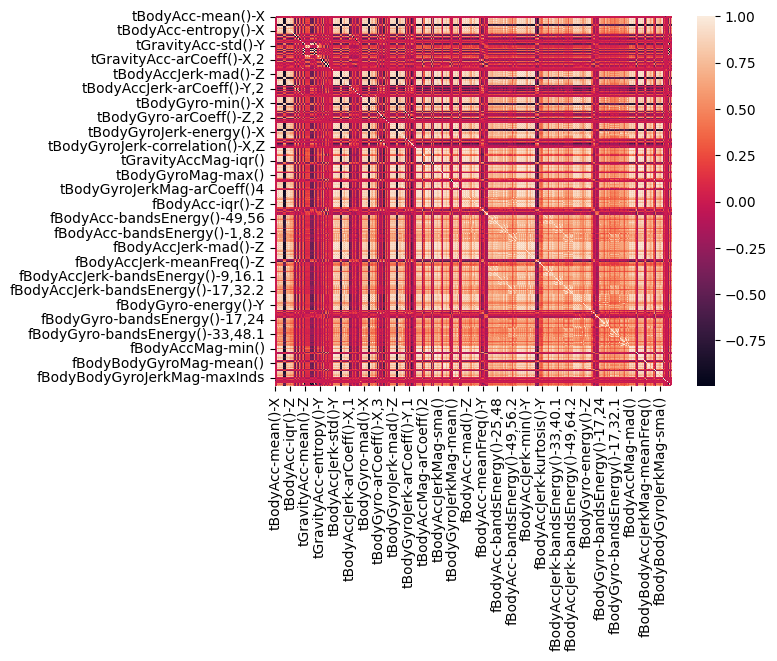

In [13]:
sns.heatmap(train.corr())

In [14]:
train.corr().unstack().abs().sort_values()['Activity_Name']

fBodyAccMag-meanFreq()         0.001396
tBodyAccJerk-mean()-Y          0.001731
fBodyGyro-maxInds-X            0.003020
tBodyGyroJerk-arCoeff()-Y,4    0.004797
tBodyAcc-mean()-Z              0.005793
                                 ...   
tBodyAccJerkMag-std()          0.731709
fBodyBodyAccJerkMag-std()      0.736038
tBodyAccJerkMag-iqr()          0.736923
tBodyAccJerkMag-mad()          0.737856
Activity_Name                  1.000000
Length: 563, dtype: float64

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مهندسی ویژگی</font>
</h2>


In [15]:
X = train.drop(['Activity_Name', 'Subject'], axis=1)
y = train['Activity_Name']

In [19]:
# To-Do (Feature Engineering)
rfc = RandomForestClassifier(random_state=42)
parametrs = {
    'n_estimators': [50, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=parametrs, scoring='accuracy', cv=10, n_jobs=-1)

grid_search.fit(X, y)

grid_search.best_params_
grid_search.best_score_
# rfc.fit(X, y)

0.9336291038154393

In [23]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 250}

In [64]:
rfc = RandomForestClassifier(n_estimators=250, random_state=42, max_depth = None, min_samples_split = 10)
rfc.fit(X, y)

RandomForestClassifier(min_samples_split=10, n_estimators=250, random_state=42)

In [65]:
sorted(rfc.feature_importances_, reverse=True)

[0.03551846260689842,
 0.030941005359056434,
 0.030660515951769433,
 0.028544466881633042,
 0.028329664079800997,
 0.026895980799410402,
 0.02361525180732757,
 0.02189376263231417,
 0.021747700458494536,
 0.01591107641232635,
 0.011563777647834238,
 0.011048374131561657,
 0.010590110251608026,
 0.010285975842354373,
 0.009957854073238268,
 0.009524141038697398,
 0.009296062789129566,
 0.009160646978711778,
 0.00909157327897497,
 0.008700277805080592,
 0.00833395518204176,
 0.008309268653459639,
 0.008193187890802206,
 0.008170095286824915,
 0.007989320524251354,
 0.007920140732234671,
 0.007911144106232747,
 0.007829462225081454,
 0.0075878976502461335,
 0.007474172315814565,
 0.00715526317837716,
 0.006846044757618652,
 0.006776714436288817,
 0.006469227323072973,
 0.006220431200200035,
 0.00610559559478808,
 0.006089200756267753,
 0.006037570635485712,
 0.006005271208966886,
 0.005670608331456797,
 0.005604761729147787,
 0.00547305959741069,
 0.005437232307930951,
 0.0053997754233745

In [66]:
selector = SelectFromModel(rfc, threshold='median', prefit=True)
X_selected_train = selector.transform(X)
X_selected_test = selector.transform(test)


C:\Users\Sabalan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Sabalan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مدل‌سازی</font>
</h2>


In [ ]:
# To-Do (Modeling)

In [ ]:
svm = SVC()

parametrs = {
    'C': [10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

grid = GridSearchCV(svm, parametrs, refit=True, cv=5)
grid.fit(X_selected_train, y)

print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
svm = SVC(C=1000, gamma=0.01, kernel='rbf')
svm.fit(X_selected_train, y)
y_per = svm.predict(X_selected_train)


In [29]:
accuracy_score(y_true=y, y_pred=y_per)

1.0

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
X_selected_train = selector.transform(X_train)
X_selected_test = selector.transform(X_test)

C:\Users\Sabalan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Sabalan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [32]:
svm = SVC(C=1000, gamma=0.01, kernel='rbf')
svm.fit(X_selected_train, y_train)
y_per = svm.predict(X_selected_test)


In [33]:
f1_score(y_true=y_test, y_pred=y_per, average='weighted')

0.9841277533071041

In [34]:
accuracy_score(y_true=y_test, y_pred=y_per)

0.9841341795104261

In [ ]:
# To-Do (Evaluation)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">پیش‌بینی برای مجموعه‌ی آزمون</font>
</h2>


In [35]:
submission = None # TO-DO (Predictions)

In [36]:
for i in X.columns:
    if i in test.columns:
        continue
    else:
        print(i)

In [56]:
selector = SelectFromModel(rfc, threshold=0.000205, prefit=True)

In [38]:
np.median(rfc.feature_importances_)

0.00041400442752709195

In [57]:
X_selected_train = selector.transform(X)
X_selected_test = selector.transform(test)


C:\Users\Sabalan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Sabalan\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [58]:
svm = SVC(C=1000, gamma=0.01, kernel='rbf')
svm.fit(X_selected_train, y)
y_per = svm.predict(X_selected_test)


In [59]:
submission = pd.DataFrame(y_per, columns=['Activity_Name'])

In [60]:
order_cat = {0:'Sitting', 1:'Standing', 2:'Walking_Upstair', 3:'Laying', 4:'Walking', 5:'Walking_Downstair'}

In [61]:
submission['Activity_Name'] = submission['Activity_Name'].map(order_cat)

In [62]:
submission

,Activity_Name
0,Standing
1,Walking
2,Sitting
3,Walking
4,Laying
...,...
2942,Standing
2943,Walking
2944,Walking_Upstair
2945,Laying
